
### Problem Statement: McCurr Consultancy – Attrition Analysis

#### Background: 
McCurr Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives and in turn curb attrition. 

#### Objective: 
To predict if an employee is going to attrite or not. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.



### Import Key Libraries and Dataset

In [1]:
# Import key Libraries
import numpy as np                                 # Numerical libraries
import pandas as pd                                # To handle data in form of rows and columns

# Import key ploting Libraries
import matplotlib.pyplot as plt                    # importing ploting libraries

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

# import Linear Regression & Logistic Regression machine learning libraries
from sklearn.linear_model import LinearRegression  # Import Linear Regression machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Standard plotly imports
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# import cufflinks as cf
# cf.set_config_file(offline=True)
# import cufflinks
# cufflinks.go_offline(connected=True)

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score
# from imblearn.over_sampling import SMOTE


In [2]:
# Import McCurr HR Employee Dataset

Employee_df = pd.read_excel('E:/PGP04B_Projects/HR_Employee_Attrition Dataset.xlsx')

In [3]:
# Check first 10 records to see and get a feel of the data structure

Employee_df.head(10)

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   
5               6        No   32  Travel_Frequently       1005   
6               7        No   59      Travel_Rarely       1324   
7               8        No   30      Travel_Rarely       1358   
8               9        No   38  Travel_Frequently        216   
9              10        No   36      Travel_Rarely       1299   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   
5  Research & Development                 2          2  Life Sciences   
6  Research & Development                 3          3        Medical   
7  Research & Development                24          1  Life Sciences   
8  Research & Development                23          3  Life Sciences   
9  Research & Development                27          3        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   
5                        4  ...                        3             80   
6                        3  ...                        1             80   
7                        4  ...                        2             80   
8                        4  ...                        2             80   
9                        3  ...                        2             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   
5                 0                  8                     2                2   
6                 3                 12                     3                2   
7                 1                  1                     2                3   
8                 0                 10                     2                3   
9                 2                 17                     3                2   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   
5              7                   7                        3   
6              1                   0                        0   
7              1                   0                        0   
8              9                   7                        1   
9              7                   7                        7   

   YearsWithCurrManager  
0           

### EDA : Exploratory Data Analysis & Quality Report

### 1.	Univariate Analysis :

#### Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks) 

### (a) Analysis of Data Types & description, range of values, missing values, outliers and duplicates 

In [4]:
# Show number of rows and columns

print(Employee_df.shape)

(2940, 34)


#### Dataset has 2940 rows and 34 columns

In [5]:
print(Employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
EmployeeNumber              2940 non-null int64
Attrition                   2940 non-null object
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome               2940 non-null int64
MonthlyRate           

In [6]:
# Check and detect anomalies (i.e. Null values in the dataset)

Employee_df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [7]:
# And check for missing values 

Employee_df.isnull().values.any()

False

#### Observation: There are no Null Values in the dataset, i.e. no missing values in the rows and columns. All variables have 2940 entries, so we don't have to include any missing values treatment.

In [8]:
# Find a duplicate rows
duplicateDFRow = Employee_df[Employee_df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [EmployeeNumber, Attrition, Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 34 columns]


#### Observation : There are no duplicate rows .

#### To eliminate data noise, we will drop variables (columns) that we do not need, i.e. 'Over18' (same value for all data), the 'Employee number' which is unique for all staff and 'StandardHours' are not required for predicting attrition.

In [9]:
Employee_df['EmployeeNumber'].unique()

array([   1,    2,    3, ..., 2938, 2939, 2940], dtype=int64)

In [10]:
Employee_df['Over18'].unique()

array(['Y'], dtype=object)

In [11]:
Employee_df.head(5)

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

In [12]:
# Drop 'EmployeeNumber', 'Over18' & 'StandardHours' Columns
Employee_df2 = Employee_df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
Employee_df2.head(10)

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   
5    Male  ...                  3                         3                 0   
6  Female  ...                  4                         1                 3   
7    Male  ...                  4                         2                 1   
8    Male  ...                  4                         2                 0   
9    Male  ...                  3                         2                 2   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   
7                 1                      2               3               1   
8                10                      2               3               9   
9                17                      3               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  
7                   0                        0               

In [13]:
# Analysis of the columns by their data type (i.e. int64, float64, object)

Employee_df2.columns.to_series().groupby(Employee_df2.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object')}

In [14]:
# Review Numerical Features 

Employee_df.describe()

EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count     2940.000000  2940.000000  2940.000000       2940.000000   
mean      1470.500000    36.923810   802.485714          9.192517   
std        848.849221     9.133819   403.440447          8.105485   
min          1.000000    18.000000   102.000000          1.000000   
25%        735.750000    30.000000   465.000000          2.000000   
50%       1470.500000    36.000000   802.000000          7.000000   
75%       2205.250000    43.000000  1157.000000         14.000000   
max       2940.000000    60.000000  1499.000000         29.000000   

         Education  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count  2940.000000              2940.000000  2940.000000     2940.000000   
mean      2.912925                 2.721769    65.891156        2.729932   
std       1.023991                 1.092896    20.325969        0.711440   
min       1.000000                 1.000000    30.000000        1.000000   
25%       2.000000                 2.000000    48.000000        2.000000   
50%       3.000000                 3.000000    66.000000        3.000000   
75%       4.000000                 4.000000    84.000000        3.000000   
max       5.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  RelationshipSatisfaction  \
count  2940.000000      2940.000000  ...               2940.000000   
mean      2.063946         2.728571  ...                  2.712245   
std       1.106752         1.102658  ...                  1.081025   
min       1.000000         1.000000  ...                  1.000000   
25%       1.000000         2.000000  ...                  2.000000   
50%       2.000000         3.000000  ...                  3.000000   
75%       3.000000         4.000000  ...                  4.000000   
max       5.000000         4.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 25 columns]

In [15]:
# Print all the data types and their unique values

for column in Employee_df.columns:
    if Employee_df[column].dtype == object:
        print(str(column) + ' : ' + str(Employee_df[column].unique()))
        print(Employee_df[column].value_counts())
        print()

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Gender : ['Female' 'Male']
Male      1764
Female    1176
Name: Gender, dtype: int64

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research D

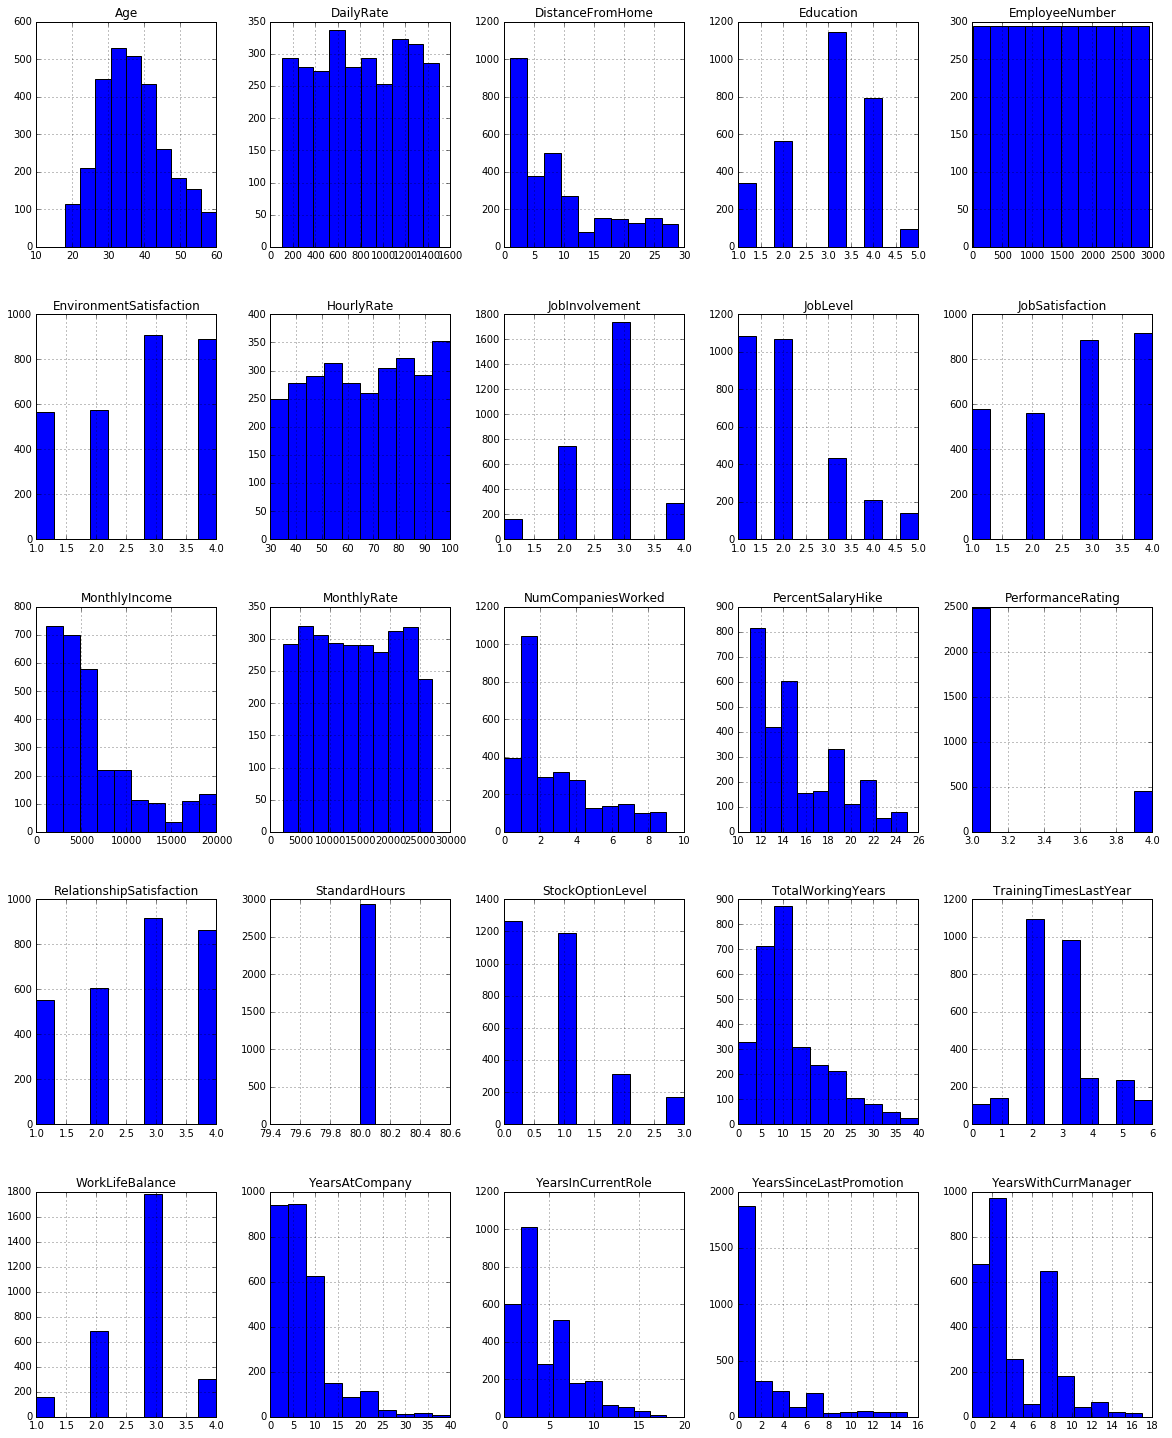

In [16]:
# Visualizing Summary Statistics of the Employee data distribution, using Histograms for each column, and excluding the Employee Number and the Attrition column

Employee_df.hist(figsize=(20,25)) 
plt.show()

# Plot Histogram for all other columns

#### Observations:

1. Most of the Histaograms are right-skewed e.g. DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
2. There is slight right-skewing of age and most staff are between 30 and 45/50 years old.
3. Daily rate is between about 270 and 320, so not a very big variation. Could be a redundant variable.
4. Employee Number is constant for all employees, hence may be a redundant variables in our analysis.

### (b) Analysis of central values  (mean, median, standard deviation & quartiles) and body of distributions / tails.

#### Checking of Quantiles - 25%,50%,75% for the Concrete Data 

#### Quantile 25%

In [17]:
Employee_df2.quantile(q=0.25)

Age                           30.0
DailyRate                    465.0
DistanceFromHome               2.0
Education                      2.0
EnvironmentSatisfaction        2.0
HourlyRate                    48.0
JobInvolvement                 2.0
JobLevel                       1.0
JobSatisfaction                2.0
MonthlyIncome               2911.0
MonthlyRate                 8045.0
NumCompaniesWorked             1.0
PercentSalaryHike             12.0
PerformanceRating              3.0
RelationshipSatisfaction       2.0
StockOptionLevel               0.0
TotalWorkingYears              6.0
TrainingTimesLastYear          2.0
WorkLifeBalance                2.0
YearsAtCompany                 3.0
YearsInCurrentRole             2.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           2.0
Name: 0.25, dtype: float64

#### Quantile 50%

In [18]:
Employee_df2.quantile(q=0.50)

Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
Name: 0.5, dtype: float64

#### Quantile 75%

In [19]:
Employee_df2.quantile(q=0.75)

Age                            43.0
DailyRate                    1157.0
DistanceFromHome               14.0
Education                       4.0
EnvironmentSatisfaction         4.0
HourlyRate                     84.0
JobInvolvement                  3.0
JobLevel                        3.0
JobSatisfaction                 4.0
MonthlyIncome                8380.0
MonthlyRate                 20462.0
NumCompaniesWorked              4.0
PercentSalaryHike              18.0
PerformanceRating               3.0
RelationshipSatisfaction        4.0
StockOptionLevel                1.0
TotalWorkingYears              15.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  9.0
YearsInCurrentRole              7.0
YearsSinceLastPromotion         3.0
YearsWithCurrManager            7.0
Name: 0.75, dtype: float64

#### Distributions of values / tails

#### Inter-Quartile Range, IQR = Q3-Q1

In [20]:
# Employee IQR = (Employee_df2.Q3() - Q1())

print(Employee_df2.quantile(q=0.75) - Employee_df2.quantile(q=0.25))

Age                            13.0
DailyRate                     692.0
DistanceFromHome               12.0
Education                       2.0
EnvironmentSatisfaction         2.0
HourlyRate                     36.0
JobInvolvement                  1.0
JobLevel                        2.0
JobSatisfaction                 2.0
MonthlyIncome                5469.0
MonthlyRate                 12417.0
NumCompaniesWorked              3.0
PercentSalaryHike               6.0
PerformanceRating               0.0
RelationshipSatisfaction        2.0
StockOptionLevel                1.0
TotalWorkingYears               9.0
TrainingTimesLastYear           1.0
WorkLifeBalance                 1.0
YearsAtCompany                  6.0
YearsInCurrentRole              5.0
YearsSinceLastPromotion         3.0
YearsWithCurrManager            5.0
dtype: float64


#### Variance

In [21]:
print(Employee_df2.var())

Age                         8.342665e+01
DailyRate                   1.627642e+05
DistanceFromHome            6.569889e+01
Education                   1.048557e+00
EnvironmentSatisfaction     1.194422e+00
HourlyRate                  4.131450e+02
JobInvolvement              5.061470e-01
JobLevel                    1.224899e+00
JobSatisfaction             1.215856e+00
MonthlyIncome               2.215732e+07
MonthlyRate                 5.064564e+07
NumCompaniesWorked          6.237926e+00
PercentSalaryHike           1.339059e+01
PerformanceRating           1.301493e-01
RelationshipSatisfaction    1.168615e+00
StockOptionLevel            7.257876e-01
TotalWorkingYears           6.051996e+01
TrainingTimesLastYear       1.661653e+00
WorkLifeBalance             4.989383e-01
YearsAtCompany              3.752154e+01
YearsInCurrentRole          1.312266e+01
YearsSinceLastPromotion     1.038052e+01
YearsWithCurrManager        1.272726e+01
dtype: float64


#### Standard Deviation

In [22]:
print(Employee_df2.std())

Age                            9.133819
DailyRate                    403.440447
DistanceFromHome               8.105485
Education                      1.023991
EnvironmentSatisfaction        1.092896
HourlyRate                    20.325969
JobInvolvement                 0.711440
JobLevel                       1.106752
JobSatisfaction                1.102658
MonthlyIncome               4707.155770
MonthlyRate                 7116.575021
NumCompaniesWorked             2.497584
PercentSalaryHike              3.659315
PerformanceRating              0.360762
RelationshipSatisfaction       1.081025
StockOptionLevel               0.851932
TotalWorkingYears              7.779458
TrainingTimesLastYear          1.289051
WorkLifeBalance                0.706356
YearsAtCompany                 6.125483
YearsInCurrentRole             3.622521
YearsSinceLastPromotion        3.221882
YearsWithCurrManager           3.567529
dtype: float64


#### Absolute Deviation or Mean Absolute Deviation

In [23]:
print(Employee_df2.mad())

Age                            7.409796
DailyRate                    350.253722
DistanceFromHome               6.572743
Education                      0.792710
EnvironmentSatisfaction        0.947116
HourlyRate                    17.649248
JobInvolvement                 0.567767
JobLevel                       0.832475
JobSatisfaction                0.957221
MonthlyIncome               3631.446085
MonthlyRate                 6188.083697
NumCompaniesWorked             2.059758
PercentSalaryHike              3.055173
PerformanceRating              0.260210
RelationshipSatisfaction       0.936585
StockOptionLevel               0.681547
TotalWorkingYears              6.034189
TrainingTimesLastYear          0.974344
WorkLifeBalance                0.547972
YearsAtCompany                 4.471687
YearsInCurrentRole             3.040922
YearsSinceLastPromotion        2.346894
YearsWithCurrManager           3.025372
dtype: float64


#### Missing values

In [24]:
Employee_df2.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Observation : There are no null values

In [25]:
# Checking the Skewness of the data

Employee_df2.skew()

Age                         0.413075
DailyRate                  -0.003517
DistanceFromHome            0.957629
Education                  -0.289533
EnvironmentSatisfaction    -0.321490
HourlyRate                 -0.032294
JobInvolvement             -0.498165
JobLevel                    1.024878
JobSatisfaction            -0.329504
MonthlyIncome               1.369117
MonthlyRate                 0.018568
NumCompaniesWorked          1.025947
PercentSalaryHike           0.820709
PerformanceRating           1.920901
RelationshipSatisfaction   -0.302673
StockOptionLevel            0.968485
TotalWorkingYears           1.116601
TrainingTimesLastYear       0.552842
WorkLifeBalance            -0.552198
YearsAtCompany              1.763628
YearsInCurrentRole          0.916895
YearsSinceLastPromotion     1.983277
YearsWithCurrManager        0.833025
dtype: float64

#### Observation:
There is low skewing for most variables.
Noted skewing is for the variables below
1. JobLevel                    1.024878
2. MonthlyIncome               1.369117
3. NumCompaniesWorked          1.025947
4. PerformanceRating           1.920901
5. TotalWorkingYears           1.116601
6. YearsAtCompany              1.763628
7. YearsSinceLastPromotion     1.983277


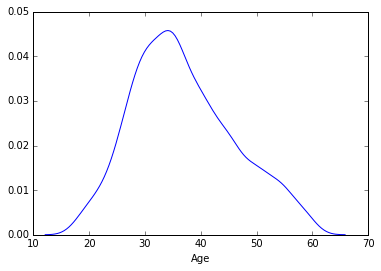

In [26]:
# Plot of skewness of age
sns.distplot(Employee_df2['Age'],hist=False)
plt.show()

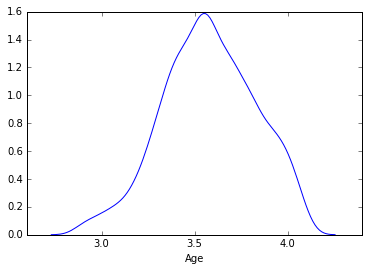

In [27]:
# Skewness of Age after log transformation
sns.distplot(np.log(Employee_df2['Age']),hist=False)
plt.show()

# log transformation to reduce skewness, grapgh now tends to a normal distribution

In [28]:
Employee_df2['Age'] = np.log(Employee_df2['Age'])

In [29]:
# View some Statistics details of the data

Employee_df2.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean      3.578034   802.485714          9.192517     2.912925   
std       0.250162   403.440447          8.105485     1.023991   
min       2.890372   102.000000          1.000000     1.000000   
25%       3.401197   465.000000          2.000000     2.000000   
50%       3.583519   802.000000          7.000000     3.000000   
75%       3.761200  1157.000000         14.000000     4.000000   
max       4.094345  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      2940.000000    2940.000000  ...        2940.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102658    4707.155770  ...           0.360762   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8380.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               2940.000000       2940.000000        2940.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081025          0.851932           7.779458   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

#### Observations : for Statistical Summary

1. Age                                                 : Staff profile is composed of all ages with Minimum = 18, Median = 36 and Maximum = 60 ; IQR = 25
2. Daily Rate                                          : Minimum = 102, Median = 802 and Maximum = 1499 ; IQR = 1397
3. Income : Generally there is a big variation or disparity with income from the daily rate to monthly rate & income as follows: DailyRate (886); MonthlyIncome (1349) & MonthlyRate (1427).
4. Min Hourly Rate = 30.00, Mean Hpurly Rate = 65.89 and Max Hourly Rate = 100.00
5. Distance from Home                                  : Minimum = 1 and Maximum = 29
6. Years At Company (YearsAtCompany)                   : Some staff with most/longest years in company = 40
7. Years In Current Role (YearsInCurrentRole)          : Staff who has stayed longest in current role has done 18 years
8. Years Since Last Promotion (YearsSinceLastPromotion): Maximum period without promotion by staff is 15 years since promotion
9. Years With Curr Manager (YearsWithCurrManager)      : Staff who's stayed with same manager longest, has done 17 years.
10. Stock Options (StockOptionLevel)                    : Most staff are given Stock Options for insentive, with most staff in the upper 50% quartile


In [30]:
#Check no. of Employees, who have left the company

Employee_df2['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

#### Observation: about a fifth (1/5) of employees left the company! Looks high 

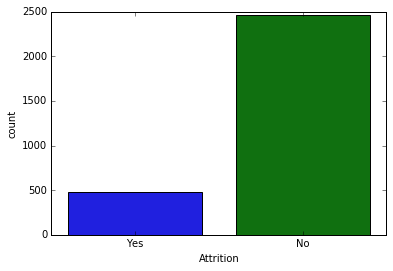

In [31]:
# Visualize the Attrition Rate from the company

sns.countplot(Employee_df2['Attrition'])

In [32]:
# Estimate Retention rate, i.e, no. of employees staying at company

(2466-474) / 2466

0.8077858880778589

#### Estimate Retention rate is about 81% if no attrition, hence want to develop a model that has a higher rate.

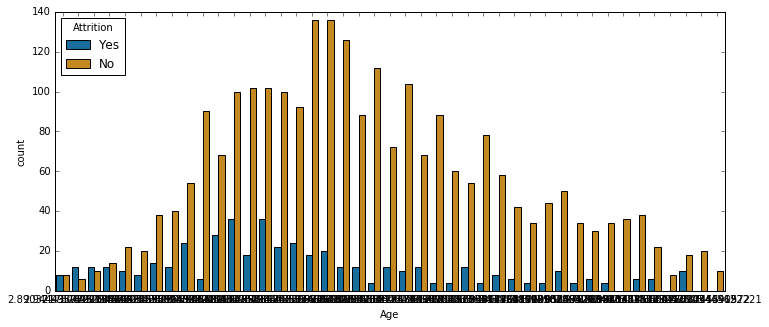

In [33]:
# Analyse between Age and Attrition

plt.subplots(figsize=(12,5))
sns.countplot(x='Age', hue='Attrition', data=Employee_df2, palette = 'colorblind')

#### Observation: Majority of those who left were between agas 28 to 33/34, and majority of ages 34-60 stayed.

In [34]:
# Checking the number of unique values in the columns
Employee_df2.nunique()

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

#### Observations:

1. Age - Unique values are 43 ---> Staff profile is composed of all ages from the minimum (18) to the maximum (60).
2. DailyRate (886); MonthlyIncome (1349) & MonthlyRate (1427) ---> there is a big variation or disparity for the income from the daily rate to monthly rate & income.
3. Attributes 'Over 18' and 'StandardHours' have only 1 unique values or are standard for all employees, so can be dropped as they are redundant info.

In [35]:
# Print all the data types and their unique values

for column in Employee_df2.columns:
    if Employee_df2[column].dtype == object:
        print(str(column) + ' : ' + str(Employee_df2[column].unique()))
        print(Employee_df2[column].value_counts())
        print()

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Gender : ['Female' 'Male']
Male      1764
Female    1176
Name: Gender, dtype: int64

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research D

In [36]:
Employee_df2.groupby(['Gender','Department','JobRole'])['Attrition'].value_counts()

Gender  Department              JobRole                    Attrition
Female  Human Resources         Human Resources            No            20
                                                           Yes           12
                                Manager                    No             8
        Research & Development  Healthcare Representative  No            92
                                                           Yes           10
                                Laboratory Technician      No           138
                                                           Yes           32
                                Manager                    No            48
                                Manufacturing Director     No           136
                                                           Yes            8
                                Research Director          No            64
                                                           Yes            2
                   

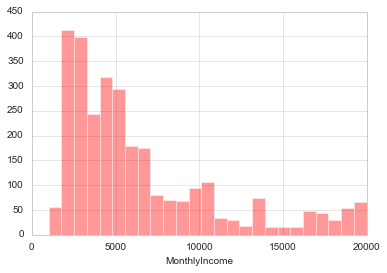

In [37]:
sns.set_style('whitegrid')
sns.distplot(Employee_df2['MonthlyIncome'], kde =False, color='red')
plt.show()

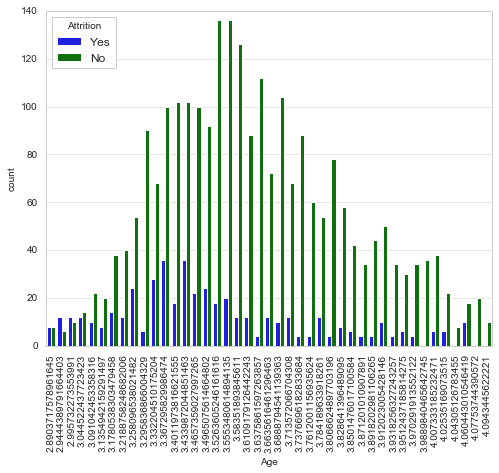

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Age',data=Employee_df2,hue='Attrition')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

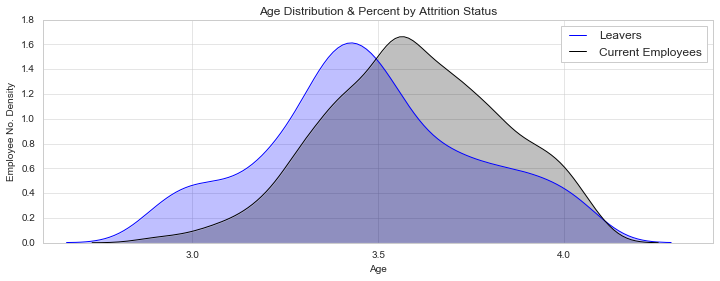

In [39]:
# Plotting the KDE Plot for Age distribution

plt.figure(figsize=(12,4))
# plt.style.use('seaborn-colorblind')
# plt.grid(True, alpha=0.5)
sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='Yes'),
            'Age'], color='b', shade=True, Label='Leavers') 
#sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='Yes'), 'Age'], color='b', shade=True, Label='Leavers') 

sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='No'), 
            'Age'], color='k', shade=True, Label='Current Employees') 
# plt.xlim(left=18, right=60)

# Set X and Y Label as below
plt.xlabel('Age') 
plt.ylabel('Employee No. Density')
plt.title('Age Distribution & Percent by Attrition Status');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

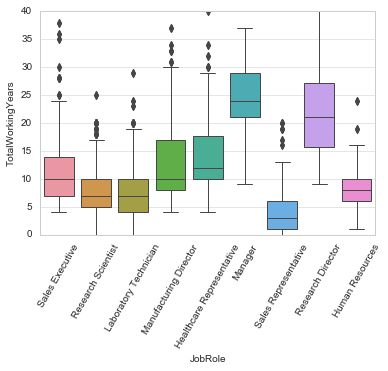

In [40]:
sns.boxplot(x= 'JobRole', y='TotalWorkingYears', data=Employee_df2)
plt.xticks(rotation=60)

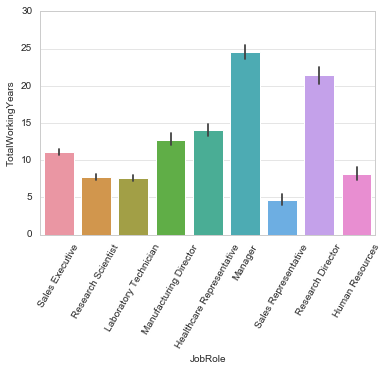

In [41]:
sns.barplot(x= 'JobRole', y='TotalWorkingYears', data=Employee_df2)
plt.xticks(rotation=60)
plt.rcParams['xtick.labelsize'] = 15

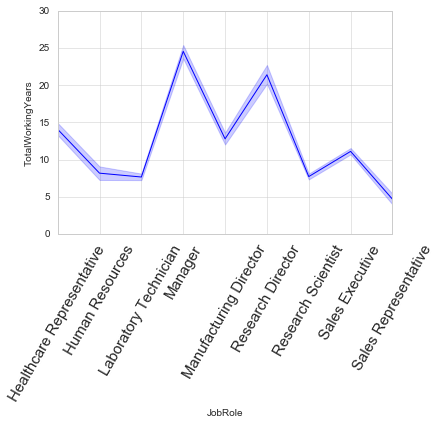

In [42]:
sns.lineplot(x= 'JobRole', y='TotalWorkingYears', data=Employee_df2)
plt.xticks(rotation=60)
plt.rcParams['xtick.labelsize'] = 25

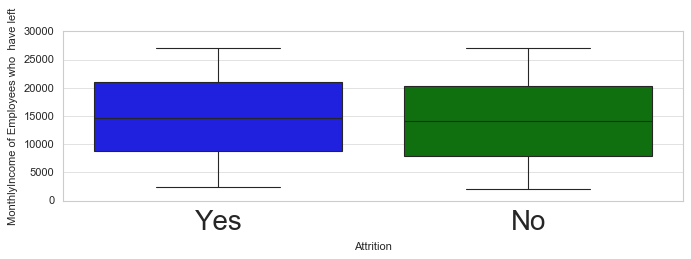

<Figure size 800x480 with 0 Axes>

In [43]:
# Check MonthlyIncome level for leavers (who have attritioned)

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
sns.boxplot(x="Attrition", y=("MonthlyRate"), data=Employee_df2)
plt.ylabel("MonthlyIncome of Employees who  have left")
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2,1,2)

# sns.violinplot(x="Attrition", y="MonthlyIncome", data=data)
# plt.ylabel("Median value in $1000s")
plt.tight_layout()
plt.show()

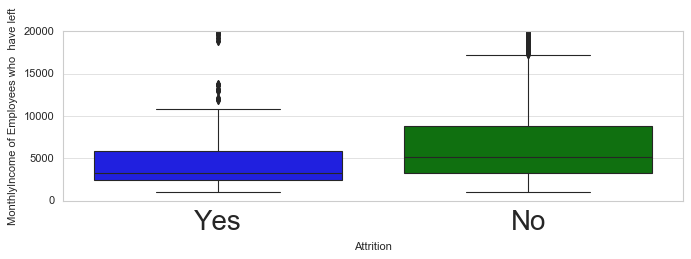

<Figure size 800x480 with 0 Axes>

In [44]:
# Check MonthlyIncome level for leavers (who have attritioned)

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
sns.boxplot(x="Attrition", y=("MonthlyIncome"), data=Employee_df2)
plt.ylabel("MonthlyIncome of Employees who  have left")
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2,1,2)

# sns.violinplot(x="Attrition", y="MonthlyIncome", data=data)
# plt.ylabel("Median value in $1000s")
plt.tight_layout()
plt.show()

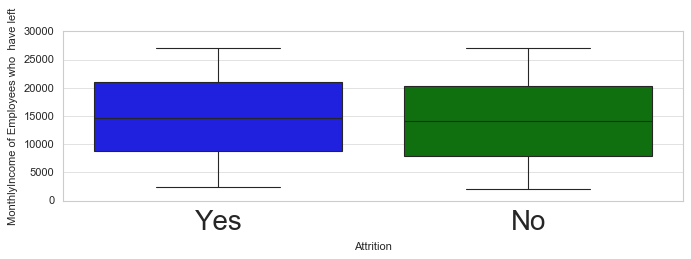

<Figure size 800x480 with 0 Axes>

In [45]:
# Check MonthlyIncome level for leavers (who have attritioned)

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
sns.boxplot(x="Attrition", y="MonthlyRate", data=Employee_df2)
plt.ylabel("MonthlyIncome of Employees who  have left")
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2,1,2)

# sns.violinplot(x="Attrition", y="MonthlyIncome", data=data)
# plt.ylabel("Median value in $1000s")
plt.tight_layout()
plt.show()

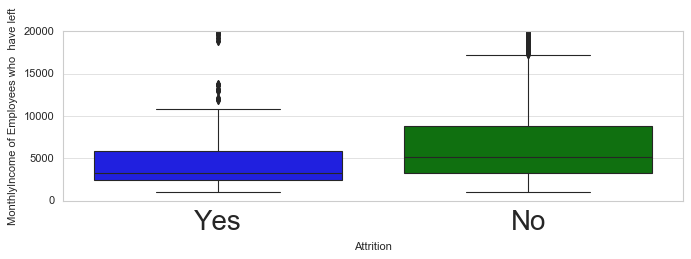

<Figure size 800x480 with 0 Axes>

In [46]:
# Check MonthlyIncome level for leavers (who have attritioned)

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
sns.boxplot(x="Attrition", y="MonthlyIncome", data=Employee_df2)
plt.ylabel("MonthlyIncome of Employees who  have left")
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2,1,2)

# sns.violinplot(x="Attrition", y="MonthlyIncome", data=data)
# plt.ylabel("Median value in $1000s")
plt.tight_layout()
plt.show()

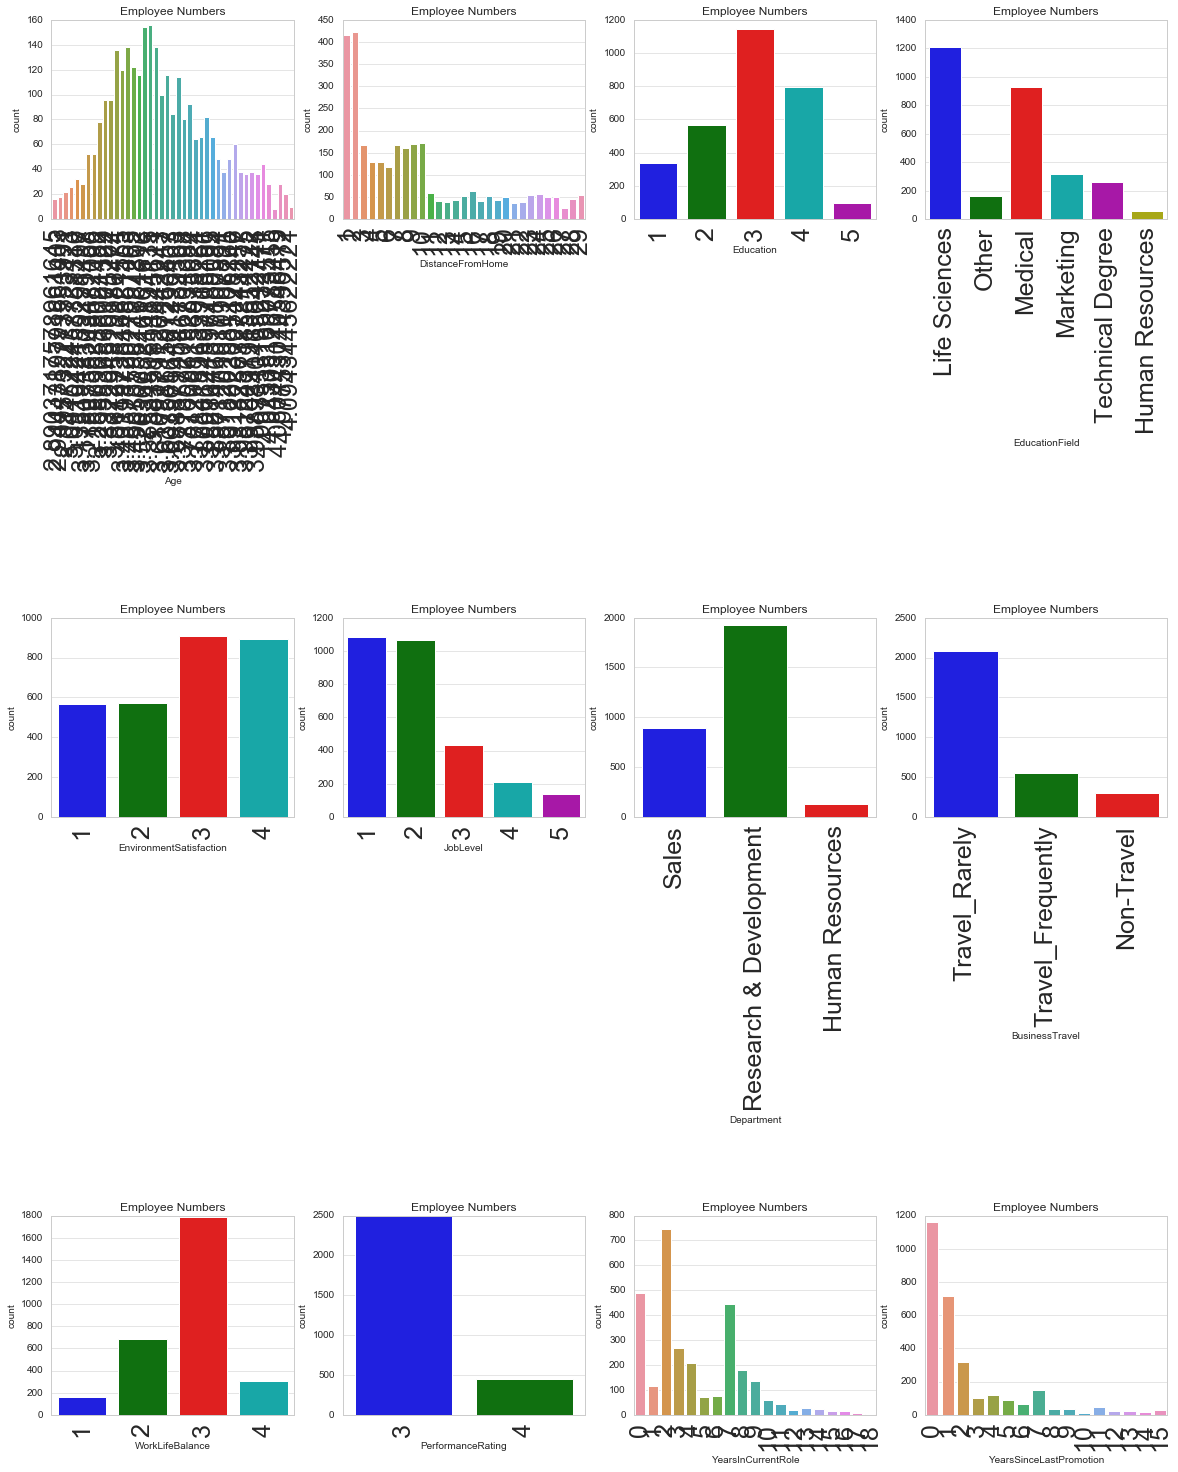

In [47]:
# Analysis of the body of distributions/tails

Employee_df2_Plots=['Age','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction', 'JobLevel','Department','BusinessTravel','WorkLifeBalance','PerformanceRating','YearsInCurrentRole','YearsSinceLastPromotion']
fig=plt.subplots(figsize=(20,25))
for i, j in enumerate(Employee_df2_Plots):
    plt.subplot(3, 4, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=j,data=Employee_df2)
    plt.xticks(rotation=90)
    plt.title("Employee Numbers")

#### Observation:
There is low skewing for most variables.
Noted skewing is for the variables below
1. Most employees live near their work of place
2. Most employees are in Life Sciences and Medical education fields
3. Most employees rate Environment at work as satisfactory (3,4)
4. Most employees rarely travel for work
5. Most employees were promoted over the last 1-2 years 

### Analysis of the body of distributions / tails

In [48]:
# Visualize Distance from home to work
Employee_df2_Dist = Employee_df2['DistanceFromHome']

(array([416., 422., 168., 128., 130., 118., 168., 160., 170., 172.,  58.,
         40.,  38.,  42.,   0.,  52.,  64.,  40.,  52.,  44.,  50.,  36.,
         38.,  54.,  56.,  50.,  50.,  24.,  46.,  54.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <a list of 30 Patch objects>)

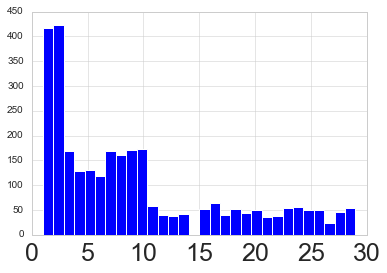

In [49]:
# Visualizing Summary Statistics of the Employee data distribution

plt.hist(Employee_df2_Dist, bins=30)

####  There is some +ve skeweness in the data for distance travelled from home

In [50]:
# Visualize Distance from home to work
Employee_df2_Dist = Employee_df2['DistanceFromHome']

(array([838., 168., 258., 118., 168., 330., 172.,  98.,  38.,  42., 116.,
         40.,  96.,  50.,  36.,  92.,  56., 100.,  24., 100.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <a list of 20 Patch objects>)

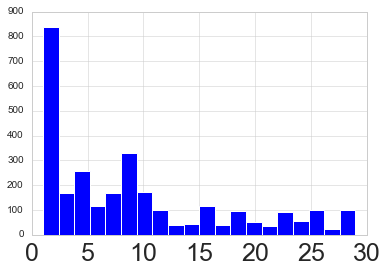

In [51]:
# Visualizing Summary Statistics of distances Employees travel distribution

plt.hist(Employee_df2_Dist, bins=20)
# Employee_df2.hist(figsize=(20,30))

####  There is some +ve skeweness in the data for Job Satisfaction

In [52]:
# Visualize Distance from home to work
Employee_df2_JobSat = Employee_df2['JobSatisfaction']

### 2. 	Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks) 

#### Analyse data between predictor variables and between predictor variables and target column

#### 2a. Check if any of the attributes/variables are Correlated 

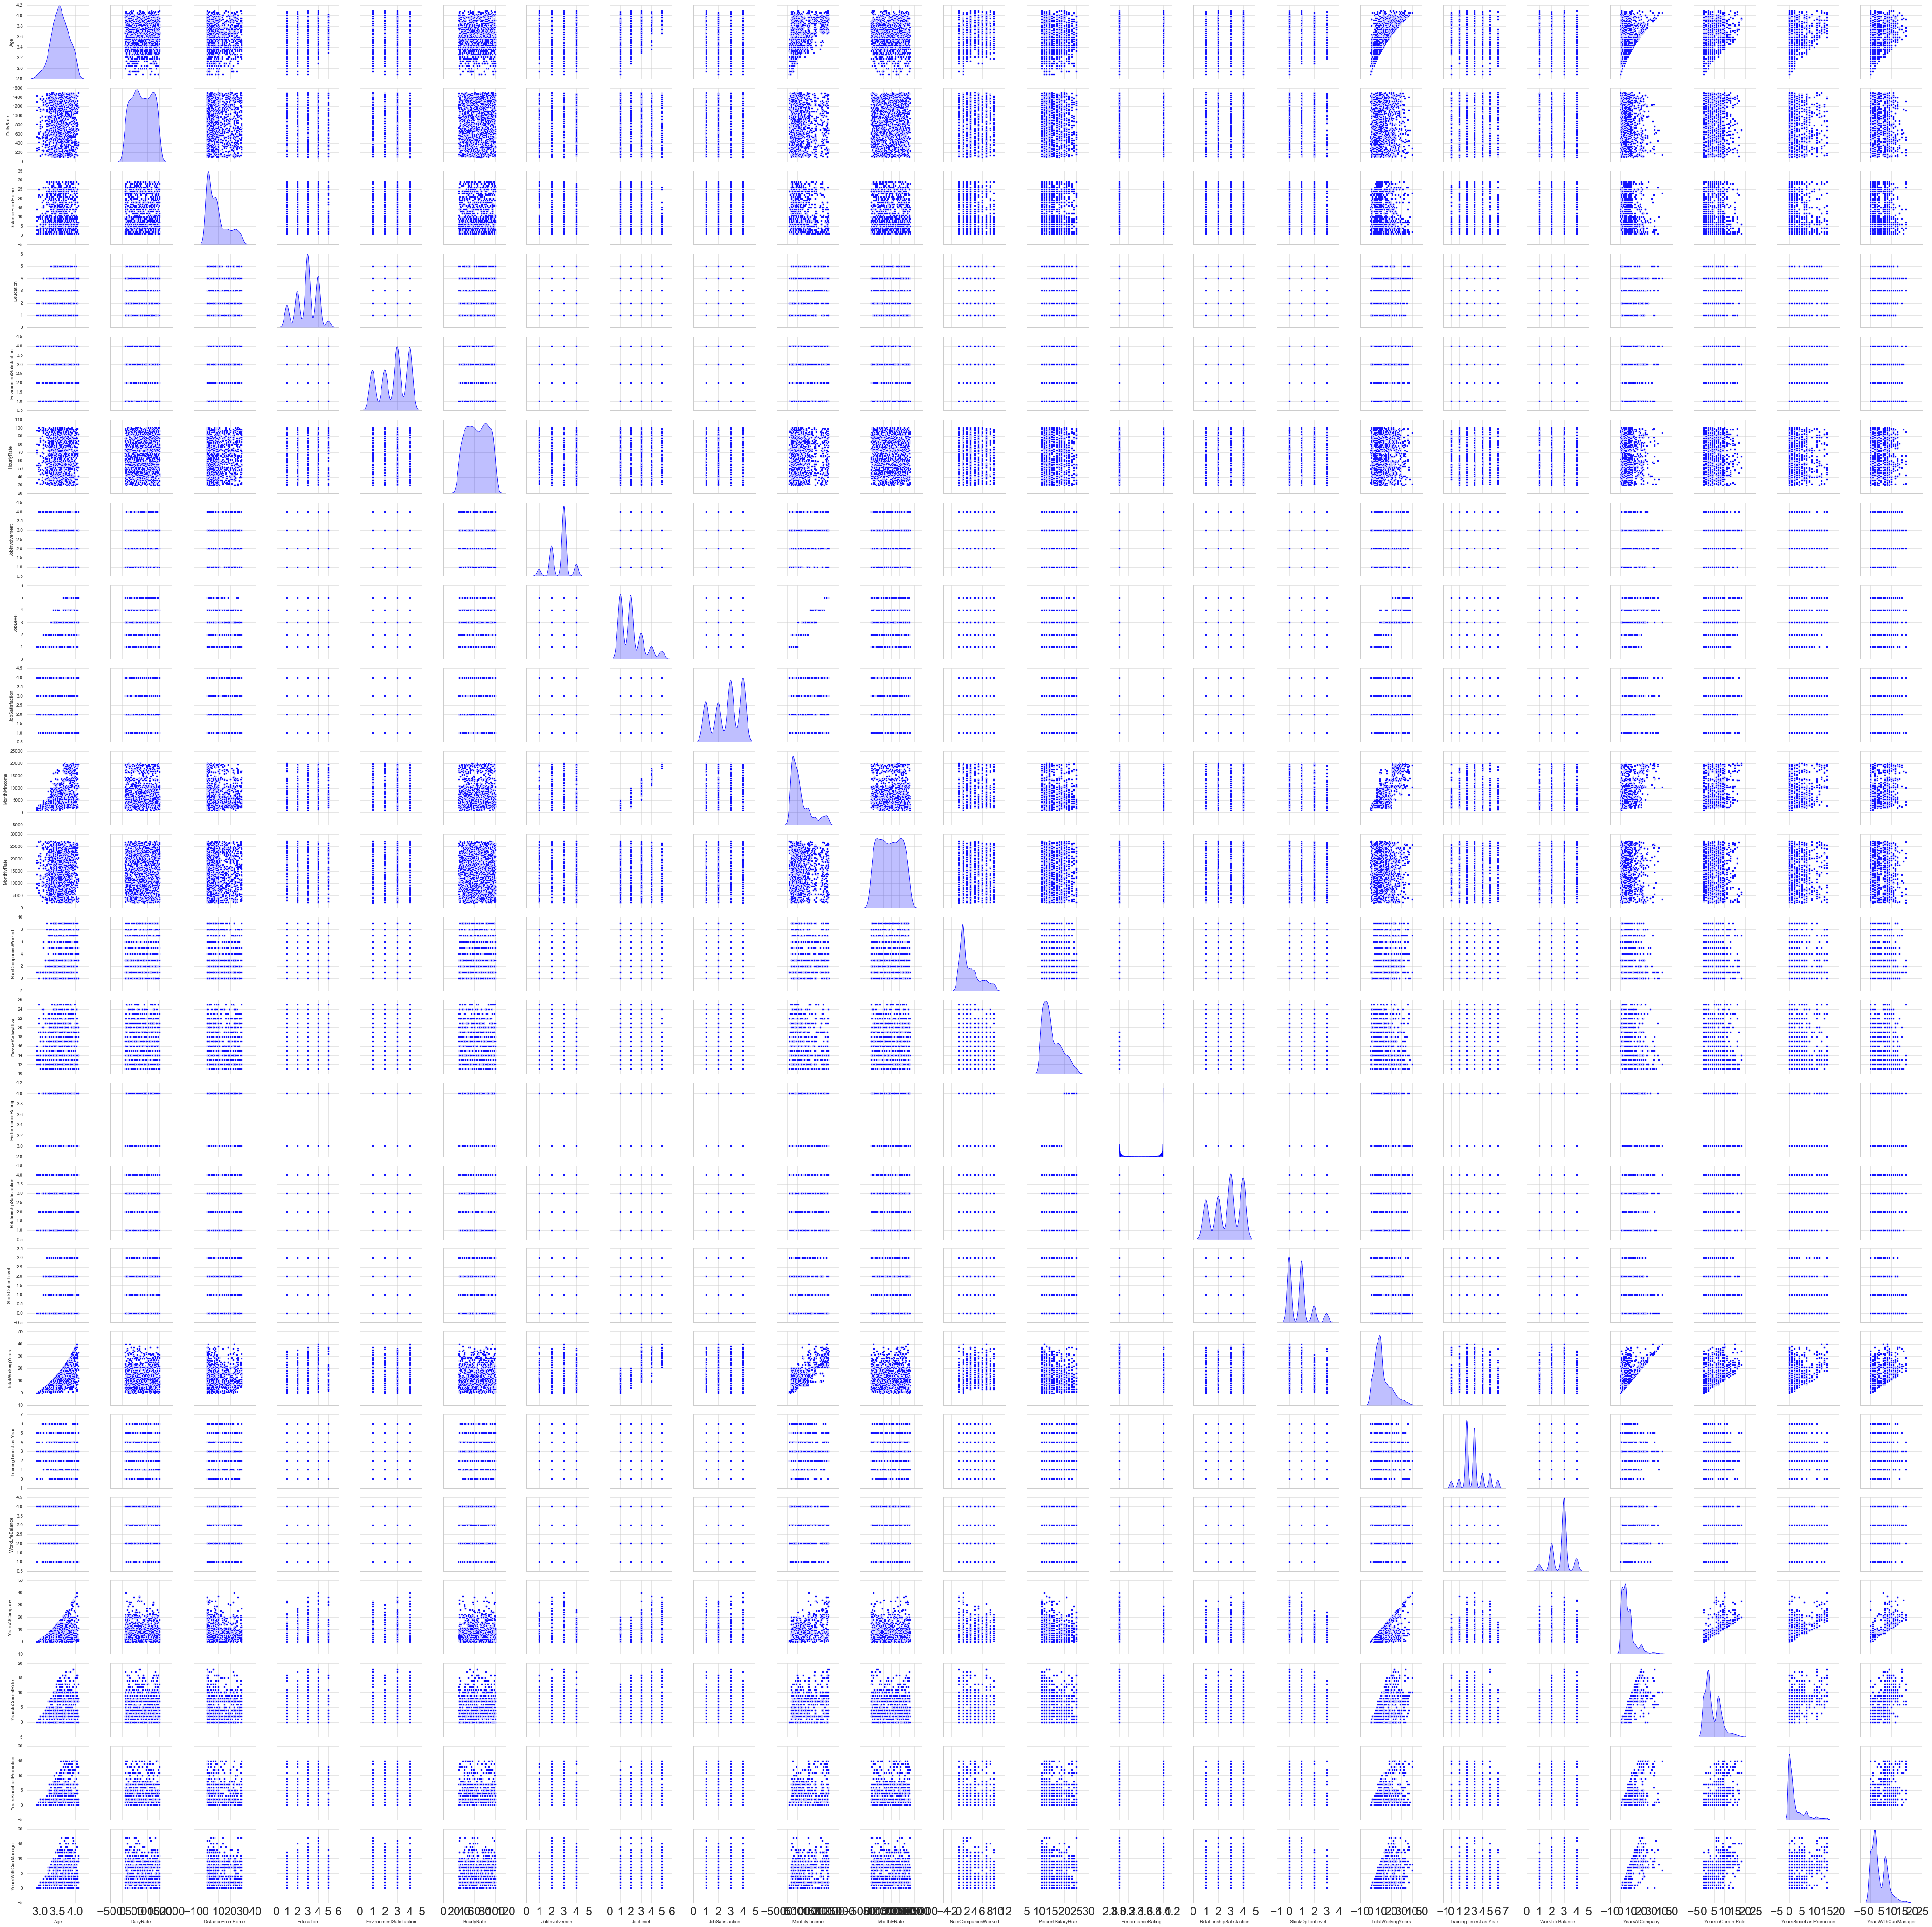

In [53]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(Employee_df2, diag_kind = 'kde')
plt.show()

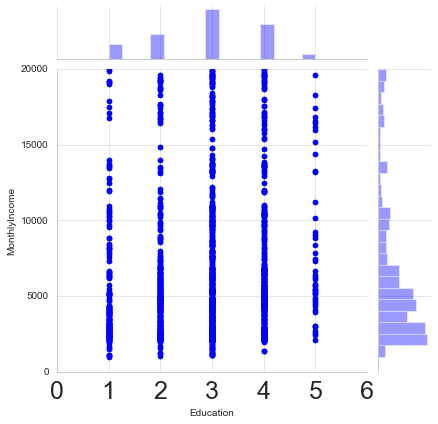

In [54]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Education', y='MonthlyIncome', data=Employee_df2)
plt.show()

#### Observation
1. Most employees have a 3 = Bachelors education.
2. Most employess earn below 5,000, a few between 5,000 and 10,000.

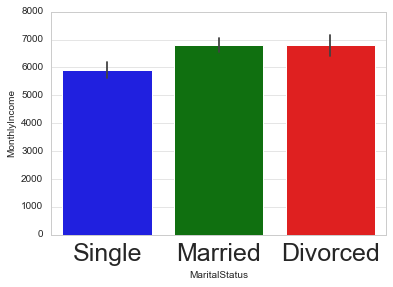

In [55]:
sns.barplot(x= 'MaritalStatus', y='MonthlyIncome', data=Employee_df2)

#### Observation
1. Most of the employees who earn above 6,000 are either Married or have been divorced. Could be explained by teh duration they have been in teh organization.
'have a '3', i.e. have a Bachelors education.
2. Most employess earn below 5,000, a few between 5,000 and 10,000.

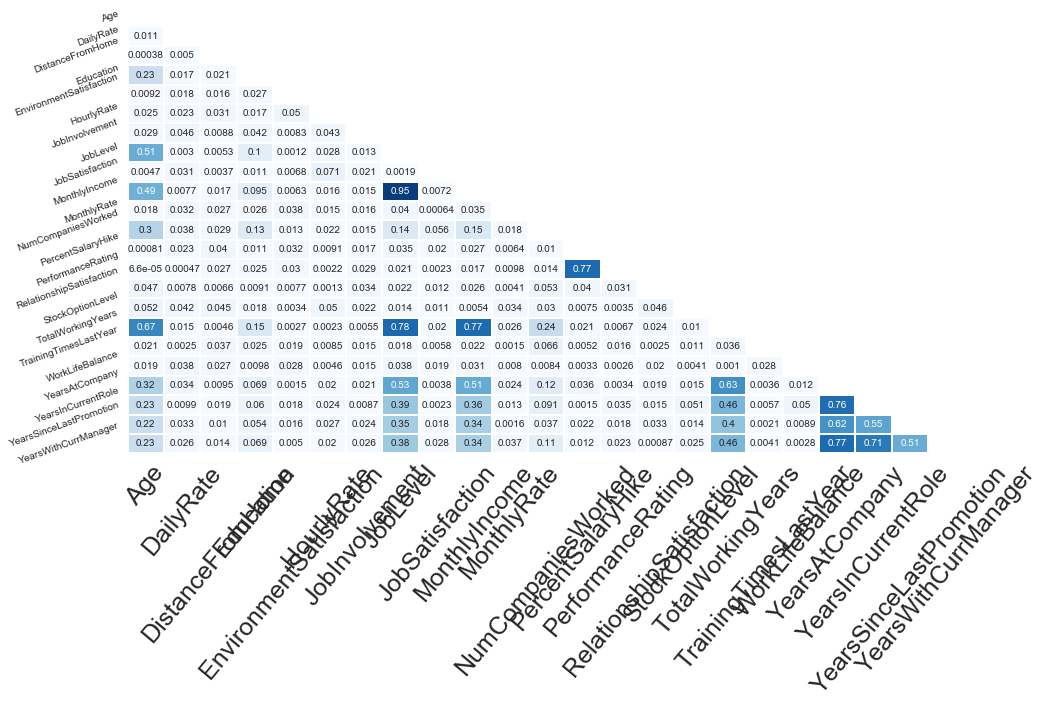

In [56]:
corr = abs(Employee_df2.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

#### Observation:

'Monthly Rate', 'Relationship Satisfaction', 'Training Times Last Year', 'Years Since Last Promotion' have the highest correlation with the target

### Check if any of the attributes/variables are Correlated 

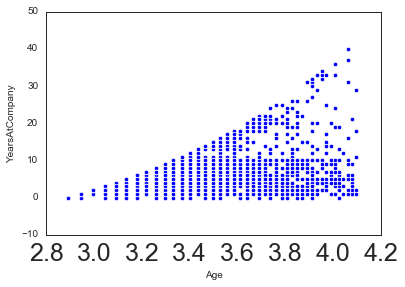

In [57]:
sns.scatterplot(Employee_df2['Age'], Employee_df2['YearsAtCompany'])

#### Observation: Age is positively correlated to the number of Years at the Company

### 2b. (i) Visualization using Boxplots

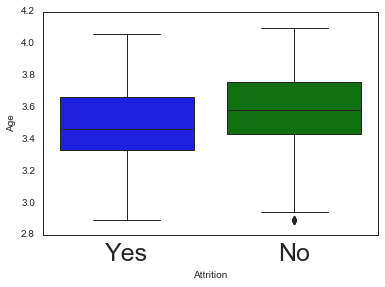

In [58]:
# Boxplot visualization by Age

sns.boxplot (Employee_df2['Attrition'], Employee_df2['Age']);

#### Observation : More younger employees leave the company compaired to older employees

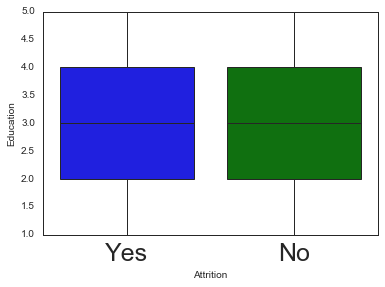

In [59]:
# Boxplot visualization by Education

sns.boxplot (Employee_df2['Attrition'],Employee_df2['Education']);

#### Observation : Education does not seem to influence or determine rates of attrition

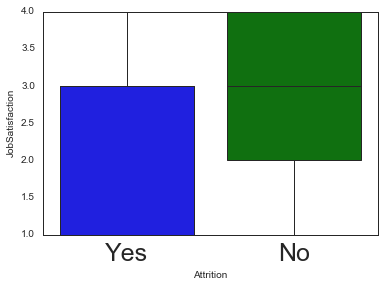

In [60]:
# Boxplot visualization by JobSatisfaction


sns.boxplot (Employee_df2['Attrition'], Employee_df2['JobSatisfaction']);

#sns.boxplot (Employee_df4['JobSatisfaction'],Employee_df4['Attrition']);

#### Observation : More employees with low Job Satisfaction leave the company

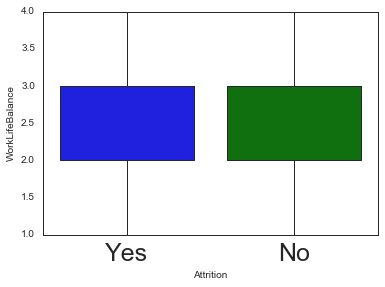

In [61]:
# Boxplot visualization by JobSatisfaction

sns.boxplot (Employee_df2['Attrition'],Employee_df2['WorkLifeBalance']);

#### Observation : Work Life Balance does not seem to influence or determine rates of attrition

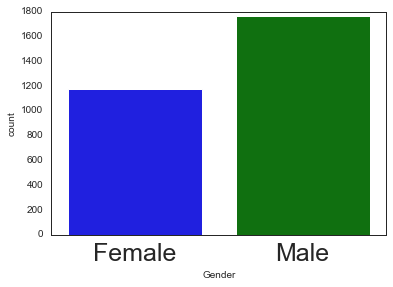

In [62]:
sns.countplot(Employee_df2['Gender'])
plt.show()

#### Observation : There are more males than females  

### 2b. (ii) Visualization using Density Curves

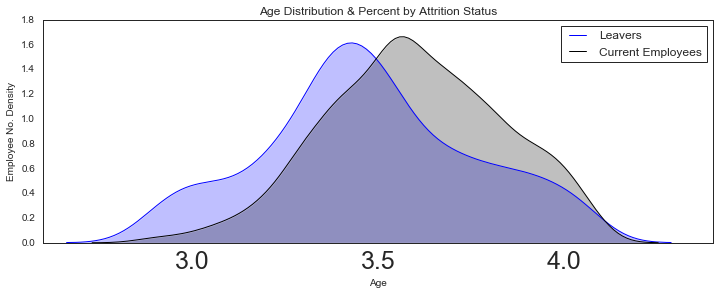

In [63]:
# Plotting the KDE Plot for Age distribution

plt.figure(figsize=(12,4))
# plt.style.use('seaborn-colorblind')
# plt.grid(True, alpha=0.5)
sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='Yes'),
            'Age'], color='b', shade=True, Label='Leavers') 
#sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='Yes'), 'Age'], color='b', shade=True, Label='Leavers') 

sns.kdeplot(Employee_df2.loc[(Employee_df2['Attrition']=='No'), 
            'Age'], color='k', shade=True, Label='Current Employees') 
# plt.xlim(left=18, right=60)

# Set X and Y Label as below
plt.xlabel('Age') 
plt.ylabel('Employee No. Density')
plt.title('Age Distribution & Percent by Attrition Status');

#### Observation: More employees who leave the organization are of a younger age profile than those who stay/remain on the organization

In [64]:
# Organisation counts by Job Role

Employee_df2['JobRole'].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

#### Analysing between various categorcal variables (Bi-variant variables)

In [65]:
pd.crosstab(Employee_df2['MaritalStatus'], Employee_df2['JobSatisfaction']) # Most staff have a afairly good job satisfaction

JobSatisfaction    1    2    3    4
MaritalStatus                      
Divorced         140  122  188  204
Married          260  262  424  400
Single           178  176  272  314

In [66]:
pd.crosstab(Employee_df2['MaritalStatus'], Employee_df2['WorkLifeBalance']) # most staff who are married have more work-life balance

WorkLifeBalance   1    2    3    4
MaritalStatus                     
Divorced         26  176  388   64
Married          84  306  810  146
Single           50  206  588   96

In [67]:
pd.crosstab(Employee_df2['Gender'], Employee_df2['JobSatisfaction'])

JobSatisfaction    1    2    3    4
Gender                             
Female           238  236  362  340
Male             340  324  522  578

In [68]:
pd.crosstab(Employee_df2['PerformanceRating'], Employee_df2['JobSatisfaction'])

JobSatisfaction      1    2    3    4
PerformanceRating                    
3                  482  474  772  760
4                   96   86  112  158

In [69]:
pd.crosstab(Employee_df2['Gender'], Employee_df2['WorkLifeBalance'])

WorkLifeBalance    1    2     3    4
Gender                              
Female            60  272   730  114
Male             100  416  1056  192

In [70]:
pd.crosstab(Employee_df2['Gender'], Employee_df2['Attrition'])

Attrition    No  Yes
Gender              
Female     1002  174
Male       1464  300

#### More males are likely to 'attrite'

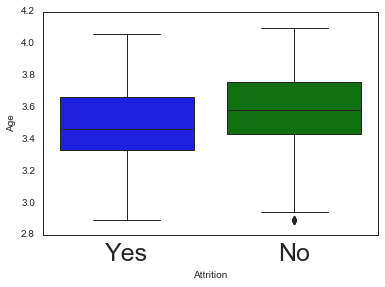

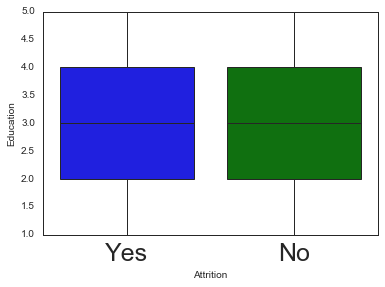

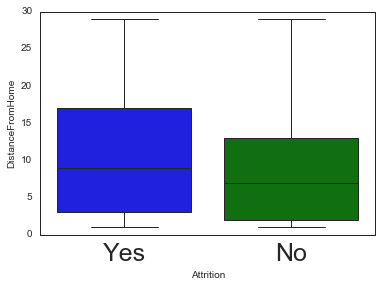

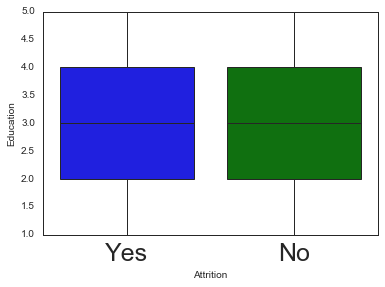

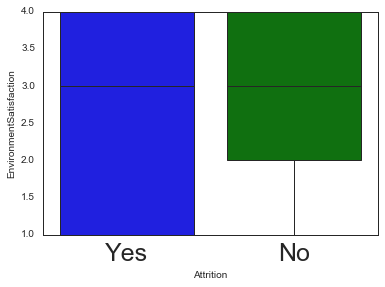

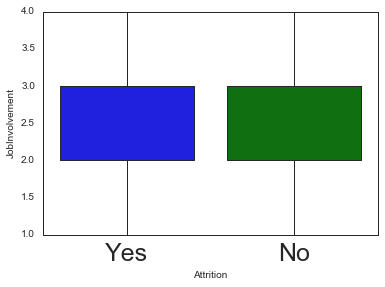

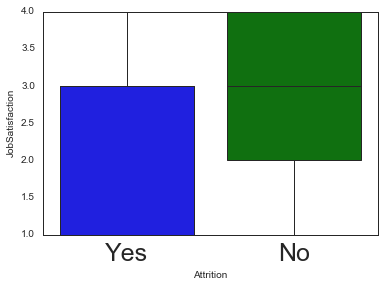

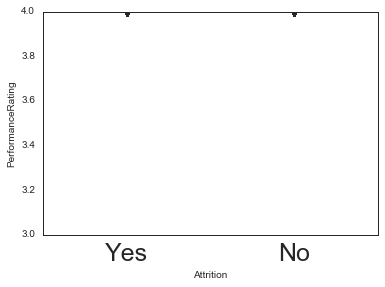

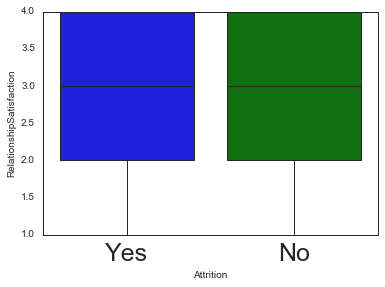

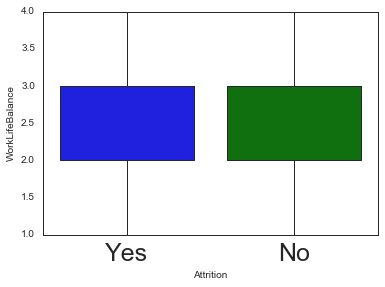

In [71]:
for i in ['Age','Education','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']:
    sns.boxplot(x='Attrition',y=i,data=Employee_df2)
    plt.show()

In [72]:
#Group numerical variables by mean for the classes of Y variable
np.round(Employee_df2.groupby(["Attrition"]).mean() ,1)

Age  DailyRate  DistanceFromHome  Education  \
Attrition                                                
No         3.6      812.5               8.9        2.9   
Yes        3.5      750.4              10.6        2.8   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                             2.8        66.0             2.8       2.1   
Yes                            2.5        65.6             2.5       1.6   

           JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
Attrition                                  ...                      
No                     2.8         6832.7  ...                3.2   
Yes                    2.5         4787.1  ...                3.2   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
No                              2.7               0.8               11.9   
Yes                             2.6               0.5                8.2   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                           2.8              2.8             7.4   
Yes                          2.6              2.7             5.1   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                        4.5                      2.2                   4.4  
Yes                       2.9                      1.9                   2.9  

[2 rows x 23 columns]

#### Observation: Attrition is higher for staff 
1. Further from the Office/home
2. The other factors do not seem to have a higher attrition rate

In [73]:
pd.crosstab(Employee_df2['Education'], Employee_df2['Attrition'], normalize='index').sort_values(by='Education',ascending=False )

Attrition        No       Yes
Education                    
5          0.895833  0.104167
4          0.854271  0.145729
3          0.826923  0.173077
2          0.843972  0.156028
1          0.817647  0.182353

#### Observation: Attrition rate is highest for lower educated staff

In [74]:
pd.crosstab(Employee_df2['JobSatisfaction'], Employee_df2['Attrition'], normalize='index').sort_values(by='JobSatisfaction',ascending=False )

Attrition              No       Yes
JobSatisfaction                    
4                0.886710  0.113290
3                0.834842  0.165158
2                0.835714  0.164286
1                0.771626  0.228374

#### Observation: Attrition rate is highest for  staff experiencing low Job satisfaction

In [75]:
pd.crosstab(Employee_df2['EnvironmentSatisfaction'], Employee_df2['Attrition'], normalize='index').sort_values(by='EnvironmentSatisfaction',ascending=False )

Attrition                      No       Yes
EnvironmentSatisfaction                    
4                        0.865471  0.134529
3                        0.863135  0.136865
2                        0.850174  0.149826
1                        0.746479  0.253521

#### Observation: Attrition rate is highest for  staff experiencing low environment satisfaction

In [76]:
pd.crosstab(Employee_df2['JobInvolvement'], Employee_df2['Attrition'], normalize='index').sort_values(by='JobInvolvement',ascending=False )

Attrition             No       Yes
JobInvolvement                    
4               0.909722  0.090278
3               0.855991  0.144009
2               0.810667  0.189333
1               0.662651  0.337349

#### Observation: Again Attrition rate is highest for staff experiencing low job involvement

In [77]:
pd.crosstab(Employee_df2['PerformanceRating'], Employee_df2['Attrition'], normalize='index').sort_values(by='PerformanceRating',ascending=False )

Attrition                No       Yes
PerformanceRating                    
4                  0.836283  0.163717
3                  0.839228  0.160772

#### Observation: Attrition rate  for staff is not affected very much by Performance Rating which ie either 3 or 4, all quite high

### 3. Feature distribution by target attribute

In [78]:
# Looking at the target column 'Attrition' to understand how the data is distributed amongst the various values

Employee_df2.groupby(["Attrition"]).count()

# Most employees are not set to 'attrite', most look like they will stay. Model best able to predict retention, rather that attrition.
 

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
Attrition                                                                  
No         2466            2466       2466        2466              2466   
Yes         474             474        474         474               474   

           Education  EducationField  EnvironmentSatisfaction  Gender  \
Attrition                                                               
No              2466            2466                     2466    2466   
Yes              474             474                      474     474   

           HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
Attrition              ...                                                
No               2466  ...               2466                      2466   
Yes               474  ...                474                       474   

           StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition                                                               
No                     2466               2466                   2466   
Yes                     474                474                    474   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
No                    2466            2466                2466   
Yes                    474             474                 474   

           YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                 
No                            2466                  2466  
Yes                            474                   474  

[2 rows x 30 columns]

In [79]:
# A correlation analysis among the different dimensions
# and also each dimension with the dependent dimension may show us the attributes that will affect attrition

In [80]:
Employee_df2.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.011325         -0.000385   0.229078   
DailyRate                 0.011325   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.000385  -0.004985          1.000000   0.021042   
Education                 0.229078  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.009171   0.018355         -0.016075  -0.027128   
HourlyRate                0.025407   0.023381          0.031131   0.016775   
JobInvolvement            0.029007   0.046135          0.008783   0.042438   
JobLevel                  0.506739   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004733   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.492516   0.007707         -0.017014   0.094961   
MonthlyRate               0.018110  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.302529   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.000810   0.022704          0.040235  -0.011111   
PerformanceRating        -0.000066   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.047174   0.007846          0.006557  -0.009118   
StockOptionLevel          0.052414   0.042143          0.044872   0.018422   
TotalWorkingYears         0.670938   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.021304   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.018954  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.324892  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.234385   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.223246  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.226029  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.009171    0.025407        0.029007   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.506739        -0.004733       0.492516  ...   
DailyRate                 0.002966         0.030571       0.007

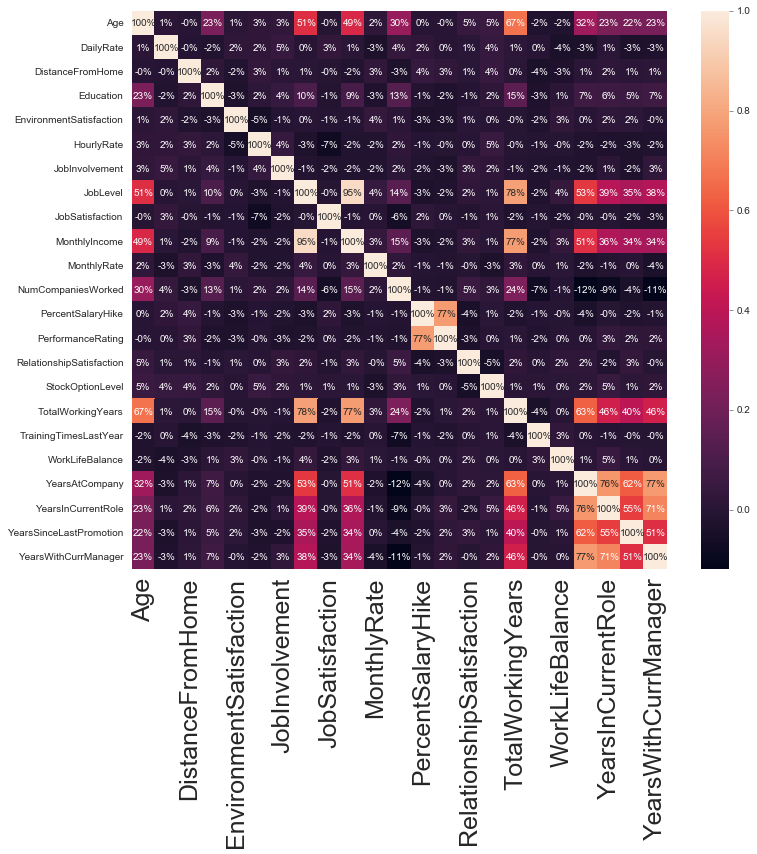

In [81]:
# Visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(Employee_df2.corr(), annot=True, fmt= '.0%')

#### Observations:

1. Age is positively correlated to Total Working Years (68%), and to a smaller extent Monthly Incone (50%) & Job Level (51%)
2. Job Level is positively correlated to Years at Company, Total Working Years and Monthly Income and to a lesser degree the Age.
3. Monthly Income is +vely correlated to some extent to Years at Company, Total Working years, Job Level and to some extent Age
4. Total Working Years is +vely correlated to YearsAtCompany, MonthlyIncome, JobLevel and Age
5. Years At Company - +vely correlated to Years With Curr Manager, Years Since Last Promotion, YearsInCurrentRole, to a less extent tpo Monthly Income & Job Level, and -vely correlated to Age
6. Years In CurrentRole - +vely correlated to Years With Curr Manager, Years At Company and to a lesser degree MonthlyIncome & JobLevel
7. Years With CurrManager is +vely correlated to Years In CurrentRole and Years A tCompany.

In [82]:
# Transform the data , by transforming non-numerical columns into numerical data columns

In [83]:
from sklearn.preprocessing import LabelEncoder

for column in Employee_df2.columns:
    if Employee_df2[column].dtype == np.number:
        continue
    Employee_df2[column] = LabelEncoder().fit_transform(Employee_df2[column])

In [84]:
Employee_df2


Attrition       Age  BusinessTravel  DailyRate  Department  \
0             1  3.713572               2        624           2   
1             0  3.891820               1        113           1   
2             1  3.610918               2        805           1   
3             0  3.496508               1        820           1   
4             0  3.295837               2        312           1   
5             0  3.465736               1        572           1   
6             0  4.077537               2        770           1   
7             0  3.401197               2        794           1   
8             0  3.637586               1         78           1   
9             0  3.583519               2        751           1   
10            0  3.555348               2        452           1   
11            0  3.367296               2         37           1   
12            0  3.433987               2        368           1   
13            0  3.526361               2        786           1   
14            1  3.332205               2          1           1   
15            0  3.367296               2        818           1   
16            0  3.465736               2        150           1   
17            0  3.091042               0        637           1   
18            0  3.970292               2        698           2   
19            0  3.637586               2        171           1   
20            0  3.178054               0        371           1   
21            1  3.583519               2        697           2   
22            0  3.526361               2        196           1   
23            0  3.044522               2        181           1   
24            1  3.526361               2        388           1   
25            0  3.970292               2        743           1   
26            1  3.465736               1        639           1   
27            0  3.737670               2        382           2   
28            0  3.784190               2        234           1   
29            0  3.828641               2        392           2   
...         ...       ...             ...        ...         ...   
2910          0  3.583519               1        380           1   
2911          0  4.025352               0        366           1   
2912          1  3.367296               2        617           1   
2913          0  3.737670               2        125           1   
2914          1  4.025352               2        134           1   
2915          0  3.713572               2        303           1   
2916          0  3.526361               2        391           2   
2917          0  3.583519               0        126           2   
2918          0  3.713572               2        522           2   
2919          0  3.465736               2        267           1   
2920          0  3.555348               2        654           0   
2921          0  3.637586               2        157           2   
2922          1  3.912023               1        488           2   
2923          0  3.583519               2        635           2   
2924          0  3.806662               2        173           2   
2925          0  3.688879               2        768           1   
2926          0  3.555348               1        684           1   
2927          0  3.688879               2        681           1   
2928          0  3.555348               2        118           1   
2929          0  3.367296               2        809           1   
2930          0  3.367296               2        228           1   
2931          1  3.912023               2        191           2   
2932          0  3.663562               2        403           2   
2933          0  3.433987               0        143           1   
2934          0  3.258097               2        663           2   
2935          0  3.583519               1        494           1   
2936          0  3.663562               2        327          

### 2. 	Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks) 

#### Analyse data between predictor variables and between predictor variables and target column

In [85]:
Employee_df2.head(10)

Attrition       Age  BusinessTravel  DailyRate  Department  \
0          1  3.713572               2        624           2   
1          0  3.891820               1        113           1   
2          1  3.610918               2        805           1   
3          0  3.496508               1        820           1   
4          0  3.295837               2        312           1   
5          0  3.465736               1        572           1   
6          0  4.077537               2        770           1   
7          0  3.401197               2        794           1   
8          0  3.637586               1         78           1   
9          0  3.583519               2        751           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                 0          1               1                        1   
1                 7          0               1                        2   
2                 1          1               4                        3   
3                 2          3               1                        3   
4                 1          0               3                        0   
5                 1          1               1                        3   
6                 2          2               3                        2   
7                23          0               1                        3   
8                22          2               1                        3   
9                26          2               3                        2   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0       0  ...                  0                         0                 0   
1       1  ...                  1                         3                 1   
2       1  ...                  0                         1                 0   
3       0  ...                  0                         2                 0   
4       1  ...                  0                         3                 1   
5       1  ...                  0                         2                 0   
6       0  ...                  1                         0                 3   
7       1  ...                  1                         1                 1   
8       1  ...                  1                         1                 0   
9       1  ...                  0                         1                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                0               6   
1                 10                      3                2              10   
2                  7                      3                2               0   
3                  8                      3                2               8   
4                  6                      3                2               2   
5                  8                      2                1               7   
6                 12                      3                1               1   
7                  1                      2                2               1   
8                 10                      2                2               9   
9                 17                      3                1               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1   

### 2b. (i) Visualization using Boxplots

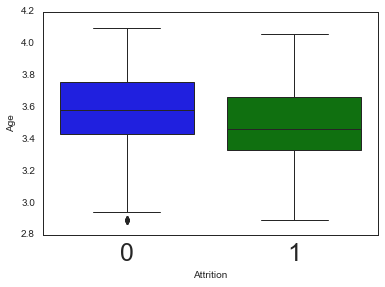

In [86]:
# Boxplot visualization by Age

sns.boxplot (Employee_df2['Attrition'],Employee_df2['Age']);

#### Observation : More younger employees leave the company compaired to older employees

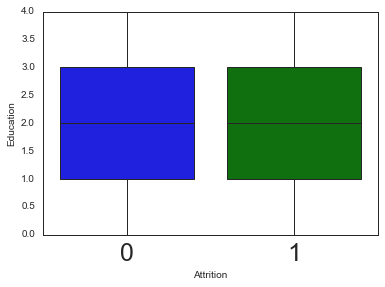

In [87]:
# Boxplot visualization by Education

sns.boxplot (Employee_df2['Attrition'],Employee_df2['Education']);

#### Observation : Education does not seem to influence or determine rates of attrition

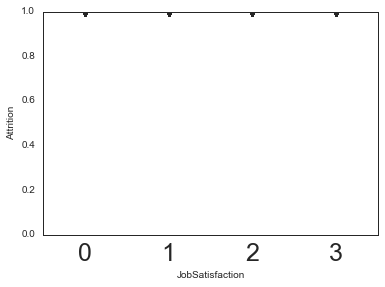

In [88]:
# Boxplot visualization by JobSatisfaction

sns.boxplot (Employee_df2['JobSatisfaction'],Employee_df2['Attrition']);

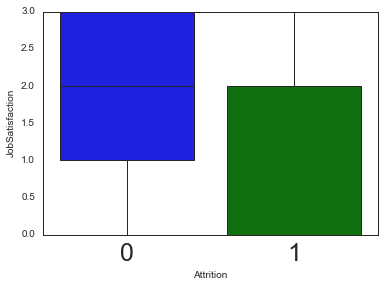

In [89]:
# Boxplot visualization by JobSatisfaction

sns.boxplot (Employee_df2['Attrition'],Employee_df2['JobSatisfaction']);

#### Observation : More employees with low Job Satisfaction leave the company

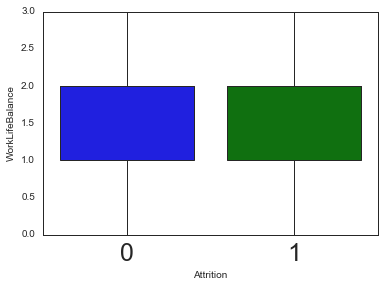

In [90]:
# Boxplot visualization by JobSatisfaction

sns.boxplot (Employee_df2['Attrition'],Employee_df2['WorkLifeBalance']);

#### Observation : Work Life Balance does not seem to influence or determine rates of attrition

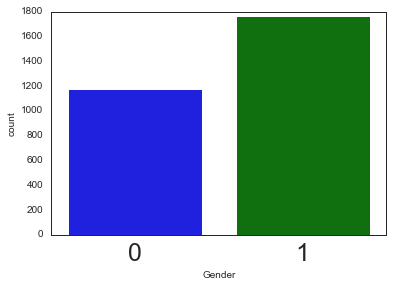

In [91]:
sns.countplot(Employee_df2['Gender'])
plt.show()

### 2b. (iv) Visualization using Density Curves

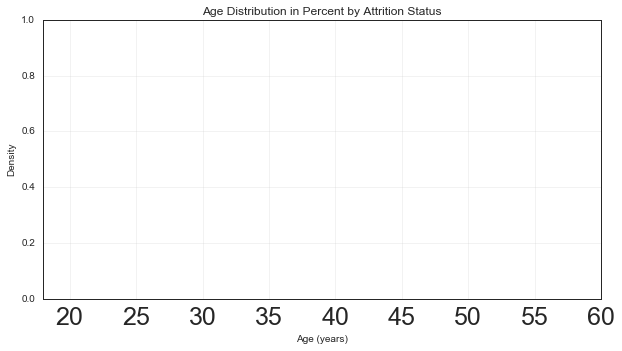

In [92]:
# visualization by density curve for Age

plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(Employee_df2.loc[Employee_df2['Attrition'] == 'No', 'Age'], label = 'Current Employee')
sns.kdeplot(Employee_df2.loc[Employee_df2['Attrition'] == 'Yes', 'Age'], label = 'Employees Leavers')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

#### Observation
1. Graph is skewed to the left, meaning more younger staff leave the company, with peak at 30yrs, while for current employees who remain have a peak of 35 years.
2. Most staff between the ages of 25-35

In [93]:
# Organisation counts by Job Role

Employee_df2['JobRole'].value_counts()

7    652
6    584
2    518
4    290
0    262
3    204
8    166
5    160
1    104
Name: JobRole, dtype: int64

### 3. Feature Engineering techniques (10 marks) 
a.	Identify opportunities (if any) to create a composite feature, drop a feature (if required) 

b.	Get data model ready and do a train test split. 

c.	Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree. 


### 3.1 Separate independent and dependent variables

In [94]:
# Copy all the predictor variables into X dataframe. Since 'Attrition' is dependent variable drop it
X = Employee_df2.drop('Attrition', axis=1)

# Copy the 'Attrition' column alone into the y dataframe. This is the dependent variable
y = Employee_df2[['Attrition']]


In [95]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [96]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [97]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -0.10917849511835617
The coefficient for BusinessTravel is -0.00501821164539711
The coefficient for DailyRate is -0.017660479153576936
The coefficient for Department is 0.08983762553055658
The coefficient for DistanceFromHome is 0.07513062806098222
The coefficient for Education is 0.017492518181611183
The coefficient for EducationField is 0.016654608107507574
The coefficient for EnvironmentSatisfaction is -0.12176268255526723
The coefficient for Gender is 0.041680331540731655
The coefficient for HourlyRate is -0.008880064725261915
The coefficient for JobInvolvement is -0.11366456849287061
The coefficient for JobLevel is 0.11776375909301352
The coefficient for JobRole is -0.04382137807783263
The coefficient for JobSatisfaction is -0.1236168636667503
The coefficient for MaritalStatus is 0.1096015197557025
The coefficient for MonthlyIncome is -0.2503978348969733
The coefficient for MonthlyRate is 0.010441265492617974
The coefficient for NumCompaniesWorked is 0.1

In [98]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.010860093513118705


### Create a regularized RIDGE model and note the coefficients

In [99]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [[-0.10916813 -0.00502194 -0.01766558  0.08978157  0.0751185   0.01748206
   0.01665398 -0.12173821  0.04166977 -0.00887842 -0.11364382  0.11746252
  -0.04377505 -0.12359862  0.10958108 -0.25011278  0.01043362  0.130634
   0.25083792 -0.04817943  0.03548492 -0.08155568 -0.06013748 -0.04782756
  -0.05972638 -0.04774342  0.04357403 -0.06667739  0.08481909 -0.0711925 ]]


### Create a regularized LASSO model and note the coefficients

In [100]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.02663165 -0.         -0.          0.          0.          0.
  0.         -0.01455789  0.         -0.         -0.01697486 -0.
  0.         -0.01887525  0.06008574 -0.07644318  0.          0.
  0.13789797 -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.01378874 -0.         -0.01154095]


#### Note : Redundant attributes dropped

### Let us compare their scores

In [101]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.2314129315523451
0.21748711541022533


In [102]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.23141290828832206
0.21748004113036623


In [103]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.11299249106848319
0.10648738980338956


#### Observation : Models score very low

### Let us generate polynomial models reflecting the non-linear interaction between some dimensions

#### Note : Create new dimensions

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [106]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(2058, 466)

#### Note : New dimensions created to make it 529 from (34 ?)  above. We are in Cursive situation, with an overfit model which will do well in training set, but not in test set!!

So we can apply other methods, e.g. Ridge Regression to reduce the coefficients.

#### (a) Fit a simple non regularized linear model on poly features-

In [107]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[-7.80257461e-17 -1.67428495e-03 -1.25272988e-02 -8.52514696e-03
  3.60840323e-02  2.95545304e-02  4.15383844e-03  7.33361101e-03
 -4.17041230e-02  2.54445189e-02  5.53839527e-04 -2.72859939e-02
 -2.16808696e-02 -1.29327713e-02 -4.32402892e-02  2.96488163e-02
 -4.95999466e-02  2.15369407e-02  5.60047293e-02  9.42577892e-02
 -2.23938600e-03 -4.68945446e-02 -4.35859964e-02 -3.08495460e-02
 -4.74976239e-02 -1.10214160e-02 -1.95695179e-03  6.36138073e-02
 -7.69587310e-02  3.77313441e-02 -3.03311957e-02  2.07072735e-02
 -4.98827970e-03 -1.02338867e-02  1.08797073e-02 -3.13303115e-02
  1.31898823e-03 -9.65076590e-04  2.21728737e-03  3.15506670e-02
  5.12144187e-03  4.79397819e-02  2.46509323e-02  1.19179592e-02
  1.83939532e-02 -7.67906252e-03 -1.96622403e-02 -1.84683649e-02
 -5.70001384e-03  1.74667272e-03 -1.12453562e-02  2.02136798e-02
  2.26373293e-02  3.61429101e-02  7.04707035e-03  3.33723249e-03
 -1.69839355e-02  4.16040151e-02 -2.55869857e-02  4.81034601e-03
  2.53062040e-03 -4.68079

In [108]:
#### Note: This has reduced some of teh coefficients, making them almost zero

#### (b) Do a Ridge Fit

In [109]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00 -1.68002431e-03 -1.25057655e-02 -8.50605869e-03
   3.60436407e-02  2.95391376e-02  4.13588263e-03  7.33852948e-03
  -4.16882949e-02  2.54247060e-02  5.41752653e-04 -2.73179151e-02
  -2.17240624e-02 -1.29330373e-02 -4.32218017e-02  2.96274607e-02
  -4.94748030e-02  2.15117886e-02  5.58734024e-02  9.42538933e-02
  -2.31186156e-03 -4.66562519e-02 -4.35669234e-02 -3.08430622e-02
  -4.71987198e-02 -1.10378974e-02 -1.98773384e-03  6.27215620e-02
  -7.65365029e-02  3.77263185e-02 -3.01828092e-02  2.06681866e-02
  -5.00511477e-03 -1.01673100e-02  1.08422171e-02 -3.12867886e-02
   1.30683934e-03 -9.63846974e-04  2.26200046e-03  3.15563873e-02
   5.15346002e-03  4.73688864e-02  2.46048468e-02  1.19252298e-02
   1.83150519e-02 -7.25279165e-03 -1.96218154e-02 -1.84239468e-02
  -5.73672617e-03  1.73093258e-03 -1.11735017e-02  2.02189370e-02
   2.25696683e-02  3.58824439e-02  7.04931771e-03  3.36081148e-03
  -1.60502696e-02  4.10024418e-02 -2.54885015e-02  4.78006166e-

In [110]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.549792113443998
0.3006855119551175


#### Need to do the k-fold cross-validation to assess/evaluate the overall average expected in the Test set

#### (c) Fit a Lasso model

In [111]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00 -1.09612094e-02 -0.00000000e+00 -1.11565859e-03
  3.44689126e-03  1.93752190e-02  0.00000000e+00  0.00000000e+00
 -2.68311369e-02  5.55104359e-03 -0.00000000e+00 -2.74315382e-02
 -0.00000000e+00  0.00000000e+00 -3.14696857e-02  2.99707581e-02
 -4.69683174e-02  0.00000000e+00  2.55434401e-02  7.85409149e-02
 -0.00000000e+00  0.00000000e+00 -2.10813619e-02 -1.80078698e-02
 -1.04592949e-02 -1.10389506e-02 -6.36060500e-03 -0.00000000e+00
 -2.27873207e-02  0.00000000e+00 -9.10685660e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.82055422e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.59871662e-03
  0.00000000e+00  0.00000000e+00  7.34328823e-03  0.00000000e+00
 -0.00000000e+00  1.33026313e-02 -0.00000000e+00 -0.00000000e+00
 -6.78194824e-03 -0.00000000e+00 -0.00000000e+00  8.43836372e-03
  6.41984123e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.56009107e-02  1.76033948e-02  0.00000000e+00  0.00000000e+00
 -0.00000000

In [112]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.3638475783814784
0.28074119562145283


#### Reduces some of the dimensions. In this case fewer dimensions are being used/ 

However, accuracy has reduced quite a bit !!!

### Creating the Model and Tuning it 

#### 1.	Algorithms that you think will be suitable for this project (one tree based and one bagging algorithm and one boosting algorithm). Use Kfold and Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks) 

In [113]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)

# KFold will split the data in 5 equal parts

In [114]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [115]:
# Linear Regression
## Since the dataset is small theefore using compete dataset for cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train,y_train)


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

NameError: name 'Pipeline' is not defined

In [ ]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(xtrain,ytrain)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(xtrain,ytrain)

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, x, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

#### 2.	Techniques employed to squeeze that extra performance out of the model without making it over fit or under fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)